Necessary Imports

In [31]:
import math
import pandas as pd

df = pd.read_csv('MLB-stats-1921-2021.csv') #dataframe of season stats since 1921
seasons = pd.Series(df['Season'], index = range(0,101)) #season index

# Are today's batters more prone to the "three true outcomes" phenomenon?

One of the biggest stories in recent years is how many hitters only produce "three true outcomes" (HR, walk, or strikeout in each plate appearance). Using just a few lines of code, we can prove if this claim is true or not.

In [32]:
#function to find "three true outcome" percentage for each season
def find_tto():
    tto = []
    for season in seasons:
        so = df.loc[list(seasons).index(season)].at['SO']
        bb = df.loc[list(seasons).index(season)].at['BB']
        hr = df.loc[list(seasons).index(season)].at['HR']
        pa = df.loc[list(seasons).index(season)].at['PA']
        ttoVar = (so + bb + hr)/pa
        tto.append(ttoVar)
    return tto


#add stat to each season in dataframe
#if statement helps prevent duplicate columns being created
if("TTO%" not in df.columns):
    df.insert(df.columns.size, 'TTO%', find_tto(), True)

<AxesSubplot:xlabel='Season'>

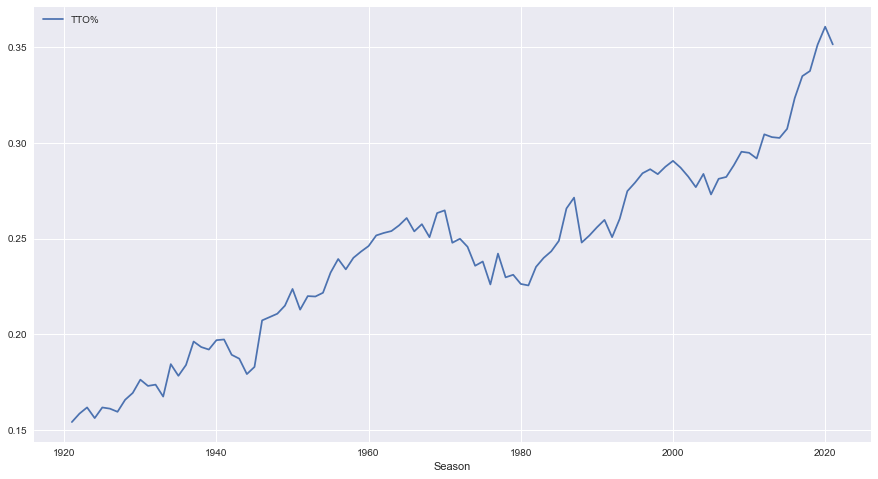

In [33]:
#plots "three true outcomes" on a graph
df.plot(x= 'Season', y= 'TTO%', figsize=(15,8))

This graph reveals that the percentage of plate appearances that end in either a HR, walk, or strikeout (aka "three true outcome" percentage) has consistently increased since 1921. This confirms the hypothesis that is so popular in today's game of baseball that many players have become reliant on these three outcomes. 

# Why have stolen bases gone down over time?

Many baseball analysts have spoken about how the stolen base is "dead" in the modern game. The number of stolen bases has seemingly decreased over time as its usefulness has become questionable in the current strategy of the game. 

<AxesSubplot:xlabel='Season'>

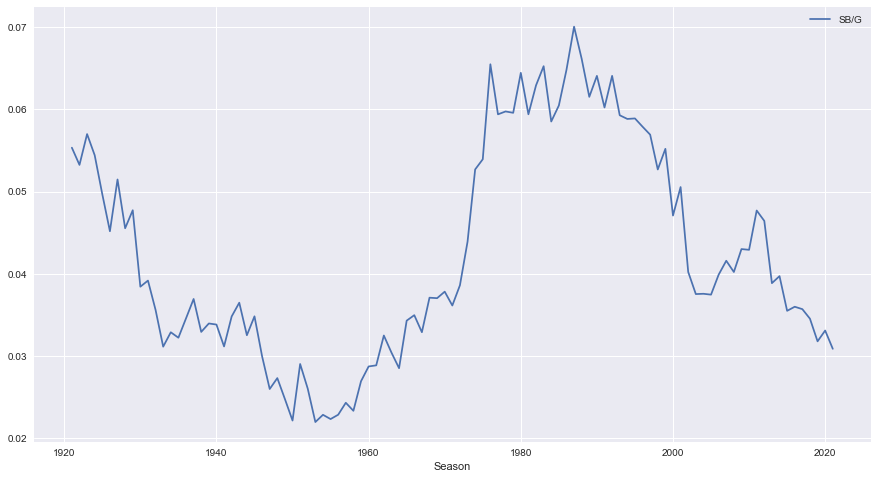

In [34]:
def find_sbg():
    sbg = []
    for season in seasons:
        sb = df.loc[list(seasons).index(season)].at['SB']
        g = df.loc[list(seasons).index(season)].at['G']
        sbgVar = sb/g
        sbg.append(sbgVar)
    return sbg


if("SB/G" not in df.columns):
    df.insert(df.columns.size, 'SB/G', find_sbg(), True)

    
df.plot(x= 'Season', y='SB/G', figsize=(15,8))

As seen in this graph, the rate of stolen bases has indeed seen a rapid decline over the past 30 years, after its golden age between 1970 and 1990, during which there was on average 0.07 stolen bases per game. 

Why exactly is it that stolen bases are being used less in today's version of baseball? 
One explanation could be that more runners are getting caught stealing.

<AxesSubplot:xlabel='Season'>

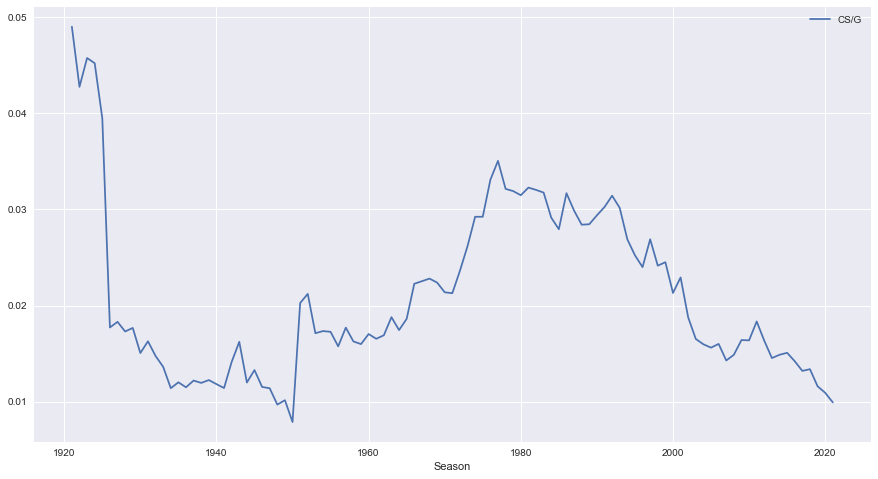

In [35]:
def find_csg():
    csg = []
    for season in seasons:
        cs = df.loc[list(seasons).index(season)].at['CS']
        g = df.loc[list(seasons).index(season)].at['G']
        csgVar = cs/g
        csg.append(csgVar)
    return csg


if("CS/G" not in df.columns):
    df.insert(df.columns.size, 'CS/G', find_csg(), True)

    
df.plot(x= 'Season', y='CS/G', figsize=(15,8))

In this graph, we see that runners getting caught steaing per game reached a relative maximum point at around the same time that stolen bases peaked (1970-1990). Since the number of runners caught stealing in each game was so high at this point, this resulted in more outs, meaning less at-bats for a team's offense. Teams most likely saw this stat, realized it was causing more outs, and decided that the risk of stealing a base did not outweigh the benefits, resulting in the league-wide decrease in stolen bases.

Another potential reason stolen bases could be decreasing is because of an increase in extra base hits (doubles, triples, and HRs).

<AxesSubplot:xlabel='Season'>

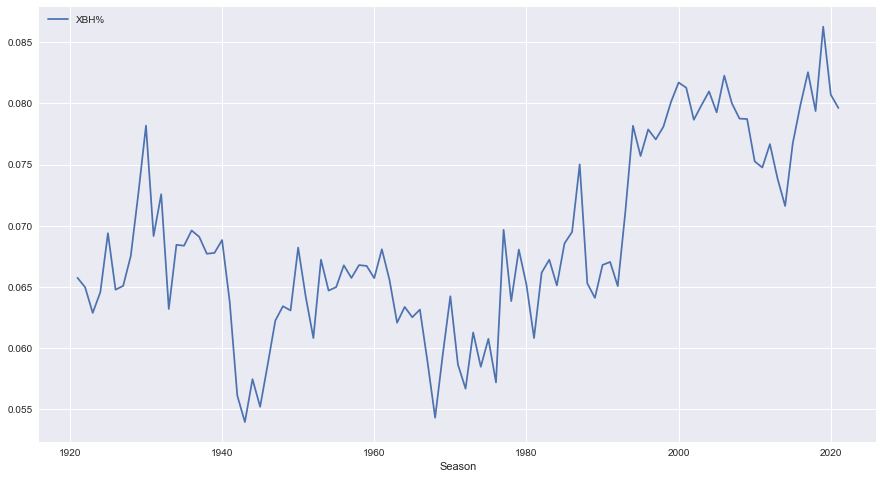

In [36]:
def find_xbhp():
    xbhp = []
    for season in seasons:
        b2 = df.loc[list(seasons).index(season)].at['2B']
        b3 = df.loc[list(seasons).index(season)].at['3B']
        hr = df.loc[list(seasons).index(season)].at['HR']
        pa = df.loc[list(seasons).index(season)].at['PA']
        xbhpVar = (b2+b3+hr)/pa
        xbhp.append(xbhpVar)
    return xbhp


if("XBH%" not in df.columns):
    df.insert(df.columns.size, 'XBH%', find_xbhp(), True)

    
df.plot(x= 'Season', y='XBH%', figsize=(15,8))

As seen in this graph, this is indeed a possible explanation for the decrease, since the increase in extra base hits reduces the need for a stolen base in order to advance an additional base. Additionally, this effectively increases the value of each plate appearance, causing teams to reduce their stolen base attempts in an effort to provide their hitters with as many plate appearances as possible.

# Is there a correlation between strikeouts and HRs?

Many baseball analysts are quick to assume that just because more HRs are being hit now than ever before, then this means that strikeout rates are spiking as a result of players "swinging for the fences". Is there actually a correlation between HRs and strikeouts?

<AxesSubplot:xlabel='Season'>

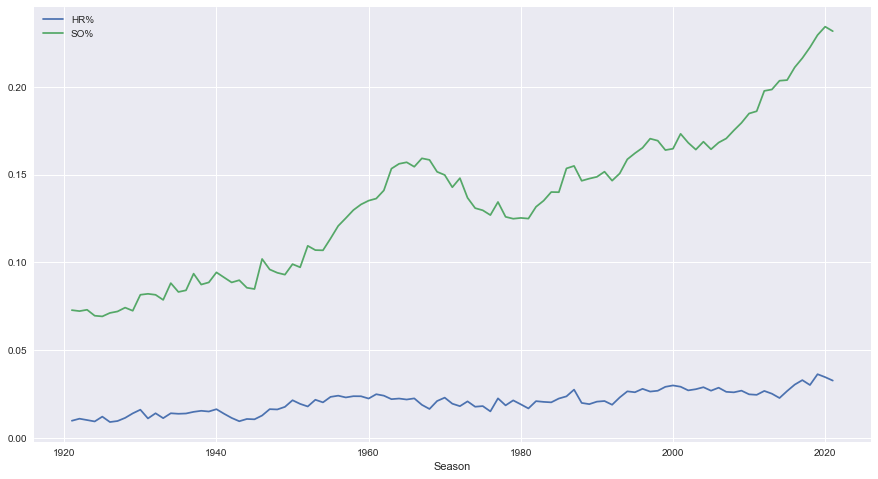

In [37]:
#find hr%
def find_hrp():
    hrp = []
    for season in seasons:
        hr = df.loc[list(seasons).index(season)].at['HR']
        pa = df.loc[list(seasons).index(season)].at['PA']
        hrpVar = hr/pa
        hrp.append(hrpVar)
    return hrp


if("HR%" not in df.columns):
    df.insert(df.columns.size, 'HR%', find_hrp(), True)

    
#find so%
def find_sop():
    sop = []
    for season in seasons:
        so = df.loc[list(seasons).index(season)].at['SO']
        pa = df.loc[list(seasons).index(season)].at['PA']
        sopVar = so/pa
        sop.append(sopVar)
    return sop


if("SO%" not in df.columns):
    df.insert(df.columns.size, 'SO%', find_sop(), True)
    

df.plot(x= 'Season', y=['HR%', 'SO%'], figsize=(15,8))

This graph shows a slight correlation between the increase in HRs and strikeouts, which have slowly been on the rise since 1921. However, in the past decade, strikeout numbers have spiked while HR numbers have been staying fairly consistent. This shows that while strikeout rates have jumped tremendously, the HR rate is not exactly on the same exponential trajectory. The spike in strikeouts can still be explained by an increase in emphasis on HRs which has caused players to "swing for the fences", increasing the amount of times they strikeout.

# Is the sacrifice bunt a dying strategy?

The strategic complexity of baseball has been widely debated over the years, with one of the topics in conversation being the use of the sacrifice bunt. To some, the sacrifice bunt brings more strategy to the game, but it has seemingly been used less over time. Is the sacrifice bunt actually dying?

<AxesSubplot:xlabel='Season'>

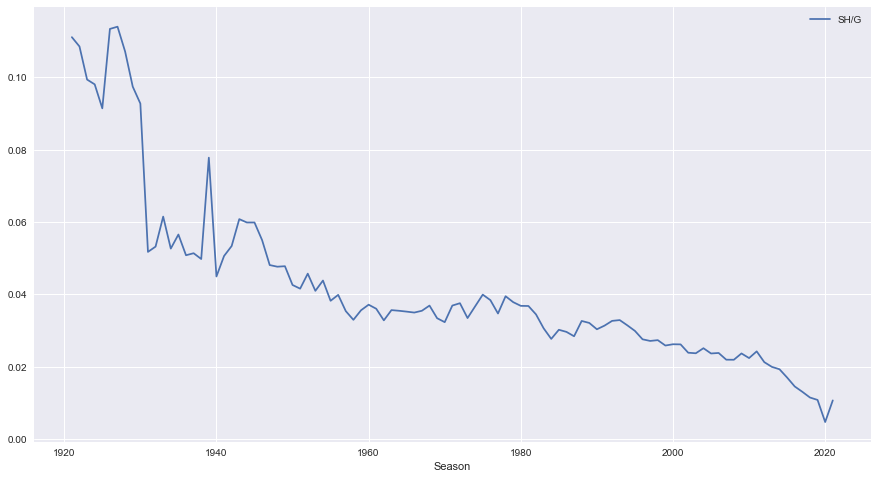

In [38]:
def find_shg():
    shg = []
    for season in seasons:
        sh = df.loc[list(seasons).index(season)].at['SH']
        g = df.loc[list(seasons).index(season)].at['G']
        shgVar = sh/g
        shg.append(shgVar)
    return shg


if("SH/G" not in df.columns):
    df.insert(df.columns.size, 'SH/G', find_shg(), True)

    
df.plot(x= 'Season', y='SH/G', figsize=(15,8))

This graph proves that the sacrifice bunt has indeed severely declined. In the 1920s version of baseball, the sacrifice bunt was very popular with the probability of seeing a successful sacrifice bunt being around 10%. However, in today's game, the sacrifice bunt has become somewhat of a rarity, as it is only seen in about 1.5% of games.